In [203]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sci
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier


%matplotlib inline

# Steps in solving a problem:

In [204]:
# Defining the problem statement .
# Collecting the datasets .
# Exploratory data analysis . 
# Feature Engineering . 
# Feature selection . 
# Modeling . 
# Training.
# Validation
# Submission

# Defining the Problem statement: 

In [205]:
# Task:
# Developing a machine learning model that predict the customers who are likely to default due to credit()
# Classification supervised model


# Features Definition:


In [206]:
# Risk Scoring features:

# form_field1: Customer Creditworthiness score based on historical data
# form_field2: A score that measures the number and riskiness of credit enquiries made by a borrower.
# Severity features: Severity is a function of amount, time since default, and number of defaults

# form_field3: Severity of default by the borrower on any loan(s).
# form_field4: Severity of default by the borrower on auto loan(s).
# form_field5: Severity of default by the borrower on education loan(s).

# Credit features:

# form_field6: Minimum of credit available on all credit cards that is automatically renewed as debts are paid off on the customer’s cards (in NGN)
# form_field7: Maximum of credit available on customer’s active credit lines (in NGN)
# form_field8: Maximum of credit available on all active credit cards that is automatically renewed as debts are paid off on the customer’s cards (in NGN)
# form_field9: Sum of available credit on credit cards that the borrower has missed 1 payment (in NGN)
# form_field10: Total amount of credit available on accepted credit lines (in NGN)
# form_field11: The amount of dues collected post-default where the due amount was more than 500 (in NGN)
# form_field12: Sum of the amount due on active credit cards (in NGN)
# form_field13: Annual amount paid towards all credit cards during the previous year (in NGN)
# form_field14: Annual income (in NGN)
# form_field15: The estimated market value of a property owned/used by the borrower (in NGN)

# Credit card features:

# form_field16: Number of active credit card that is automatically renewed as debts are paid off on which full credit limit is utilized by the borrower
# form_field17: Number of active credit cards on which full credit limit is utilized by the borrower
# form_field18: Number of active credit lines on which full credit limit is utilized by the borrower
# form_field19: Number of active credit cards on which at least 75% credit limit is utilized by the borrower
# form_field20: Number of active credit lines on which at least 75% credit limit is utilized by the borrower
# form_field21: Average utilization of active revolving credit card loans (%)
# form_field22: Average utilization of line on all active credit lines activated in last 2 years (%)
# form_field23: Average utilization of line on all active credit cards activated in last 1 year (%)
# form_field24: Average utilization of line on credit cards on which the borrower has missed 1 payment during the last 6 months (%)
# form_field25: Average tenure of active revolving credit cards (in days)
# form_field26: Tenure of oldest credit card among all active credit cards (in days)
# form_field27: Tenure of oldest revolving credit card among all active revolving credit cards (in days)

# Time-related features:

# form_field28: Number of days since last missed payment on any credit line
# form_field29: Tenure of the oldest credit line (in days)
# form_field30: Maximum tenure on all auto loans (in days)
# form_field31: Maximum tenure on all education loans (in days)
# form_field32: Sum of tenures (in months) of active credit cards
# form_field33: Sum of tenures (in months) of active credit cards
# form_field34: Number of active credit lines over the last 6 months on which the borrower has missed 1 payment
# form_field35: Number of revolving credit cards over the last 2 years on which the borrower has missed 1 payment
# form_field36: Number of active credit lines
# form_field37: Number of credit cards with an active tenure of at least 2 years
# form_field38: Number of credit lines activated in the last 2 years
# form_field39: Number of credit lines on which the borrower has current delinquency

# Percentage related features:

# form_field40: Utilization of line on active education loans (%)
# form_field41: Utilization of line on active auto loans (%)

# Other features:

# form_field42: Financial stress index of the borrower. This index is a function of collection trades, bankruptcies files, tax liens invoked, etc.
# form_field43: Number of credit lines on which the borrower has never missed a payment in the last 2 years, yet considered as high-risk loans based on the market prediction of the economic scenario
# form_field44: Ratio of the maximum amount due on all active credit lines and the sum of amounts due on all active credit lines
# form_field45: Number of mortgage loans on which the borrower has missed 2 payments
# form_field46: Number of auto loans on which the borrower has missed 2 payments
# form_field47: Type of product that the applicant applied for. (C = Charge; L = Lending)
# form_field48: Undefined Variable
# form_field49: Undefined Variable
# form_field50: Ratio of the minimum amount due on all active credit lines and the sum of amounts due on all active credit lines

# Target features:

# default_status: defaulted or not. (yes:1, no: 0)


# Data Collection:

In [273]:
# Loading the dataset
train = pd.read_csv(r'C:\Users\Usm243\Desktop\Data\Hackathon\Train.csv')
test = pd.read_csv(r'C:\Users\Usm243\Desktop\Data\Hackathon\Test.csv')

In [208]:
#function to describe data with missing value and range

def description(df):
    
    #total missing values
    mis_val = df.isnull().sum()
    
    # Percentage of the missing values
    mis_val_percent = 100*df.isnull().sum()/ len(df)
    
    dtype = []
    rng = []
    categorical  = []
    numerical = []
    for col in df.columns:
        dtype.append('categorical') if df[col].dtype == 'object' else dtype.append('numerical')
        rng.append(f'{df[col].nunique()} labels') if df[col].dtype == 'object' else rng.append('{}'.format(np.subtract(df[col].max(), df[col].min())))
        categorical.append(col) if df[col].dtype == 'object' else numerical.append(col)
    
    data = pd.DataFrame({'dtype': dtype, 'Range': rng}, index = df.columns)
    
    # Table of the missing value
    mis_val_table = pd.concat([mis_val, mis_val_percent, data], axis = 1)
    
    # Rename the columns of the missing values
    mis_val_table_ren_column = mis_val_table.rename(columns = {0 : 'Missing Values', 1: '% of Total values', 2: 'dtype', 3: 'Range' })
    
    # sort the percentage of missing values and round to 2 d.p
    mis_val_table_ren_column = mis_val_table_ren_column[mis_val_table_ren_column.iloc[:, 1] != 0 ].sort_values('% of Total values', ascending = False).round(2)
    
    # print the summary of the dataset
    print('Your selected dataset has {} columns.'.format(df.shape[1])+ '\n' + 'There are {} columns that have missing values.'.format(mis_val_table_ren_column.shape[0]))
    
    print('Your selected dataset has {} categorical and {} numerical features'.format(len(categorical), len(numerical)))
    # Return the dataframe with missing informations
    return mis_val_table_ren_column

In [209]:
# Implement the function generated
description(train)

Your selected dataset has 52 columns.
There are 48 columns that have missing values.
Your selected dataset has 3 categorical and 49 numerical features


,Missing Values,% of Total values,dtype,Range
form_field40,43729,78.09,numerical,645.4290000000001
form_field31,39408,70.37,numerical,47085.0
form_field41,38229,68.27,numerical,255.0
form_field11,31421,56.11,numerical,170742992.0
form_field45,31317,55.92,numerical,5.0
form_field23,28123,50.22,numerical,97200.0
form_field30,25509,45.55,numerical,25550.0
form_field35,23148,41.34,numerical,10.0
form_field15,22475,40.13,numerical,3455579193.0
form_field48,20889,37.30,numerical,53210144.0


In [210]:
train.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,...,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,...,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,no
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,...,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,...,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,no
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,...,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,no


In [211]:
test.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000032,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,...,NaN,0.825000,1.01,0.800000,NaN,0.0,charge,NaN,0.000000,0.011221
1,Apcnt_1000048,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,...,18.8415,0.507694,4.04,0.623248,1.0,0.0,lending,NaN,0.504974,0.043525
2,Apcnt_1000052,NaN,0.27505,0.0600,0.0000,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.00,NaN,NaN,NaN,charge,NaN,0.000000,NaN
3,Apcnt_1000076,3232.0,0.28505,2.8032,0.0000,0.0,0.0,473802.0,473802.0,1724437.0,...,NaN,0.916663,2.02,0.464224,NaN,NaN,charge,90.163742,0.788809,0.104029
4,Apcnt_1000080,3466.0,2.09545,0.8318,2.5182,0.0,19839.0,1150662.0,1150662.0,7860523.0,...,NaN,0.234047,23.23,0.726688,0.0,0.0,lending,1303.587148,1.637733,0.163124


In [212]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 52 columns):
Applicant_ID      56000 non-null object
form_field1       53471 non-null float64
form_field2       52156 non-null float64
form_field3       55645 non-null float64
form_field4       55645 non-null float64
form_field5       55645 non-null float64
form_field6       42640 non-null float64
form_field7       50837 non-null float64
form_field8       42640 non-null float64
form_field9       47992 non-null float64
form_field10      55645 non-null float64
form_field11      24579 non-null float64
form_field12      46105 non-null float64
form_field13      50111 non-null float64
form_field14      56000 non-null int64
form_field15      33525 non-null float64
form_field16      42964 non-null float64
form_field17      44849 non-null float64
form_field18      45598 non-null float64
form_field19      55996 non-null float64
form_field20      55645 non-null float64
form_field21      40146 non-null 

In [213]:
# Rows and Columns of the train dataset
print(f'Train shape is {train.shape} \nThe number of rows is  {train.shape[0]} \nThe number of columns is {train.shape[1]}' )
# Rows and Columns of the test dataset
print(' ')
print(f'Test shape is {test.shape} \nThe number of rows is  {test.shape[0]} \nThe number of columns is {test.shape[1]}' )

Train shape is (56000, 52) 
The number of rows is  56000 
The number of columns is 52
 
Test shape is (24000, 51) 
The number of rows is  24000 
The number of columns is 51


In [214]:
# Check for size of null values in categorical variable(Train set)
for col_name in train.columns:
    if train[col_name].dtypes == 'object':
        unique_cat =  train[col_name].nunique()
        null_value = train[col_name].isnull().sum()
        print('Feature {a} has {b} unique categories'.format(a = col_name, b = unique_cat))
        print('Feature {a} has {b} null values '.format(a = col_name, b = null_value))

Feature Applicant_ID has 56000 unique categories
Feature Applicant_ID has 0 null values 
Feature form_field47 has 2 unique categories
Feature form_field47 has 0 null values 
Feature default_status has 2 unique categories
Feature default_status has 0 null values 


In [215]:
# Check for size of null values in categorical variable(Test set)
for col_name in test.columns:
    if test[col_name].dtypes == 'object':
        unique_cat =  test[col_name].nunique()
        null_value = test[col_name].isnull().sum()
        print('Feature {a} has {b} unique categories'.format(a = col_name, b = unique_cat))
        print('Feature {a} has {b} null values '.format(a = col_name, b = null_value))

Feature Applicant_ID has 24000 unique categories
Feature Applicant_ID has 0 null values 
Feature form_field47 has 2 unique categories
Feature form_field47 has 0 null values 


# Exploratory Data Analysis

In [216]:
train[train['default_status'] == 'no'].shape[0]

42285

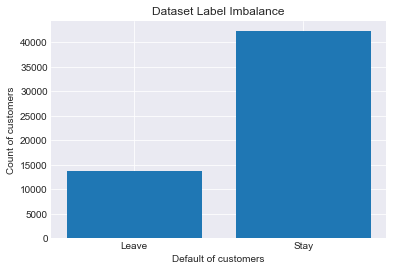

In [217]:
# Check the imbalance of the 
sns.set_style('darkgrid')
count_yes = train[train['default_status'] == 'yes'].shape[0]
count_no = train[train['default_status'] == 'no'].shape[0]

plt.bar(['Leave', 'Stay'], [count_yes, count_no])
plt.title('Dataset Label Imbalance')
plt.xlabel('Default of customers')
plt.ylabel('Count of customers')

plt.show()

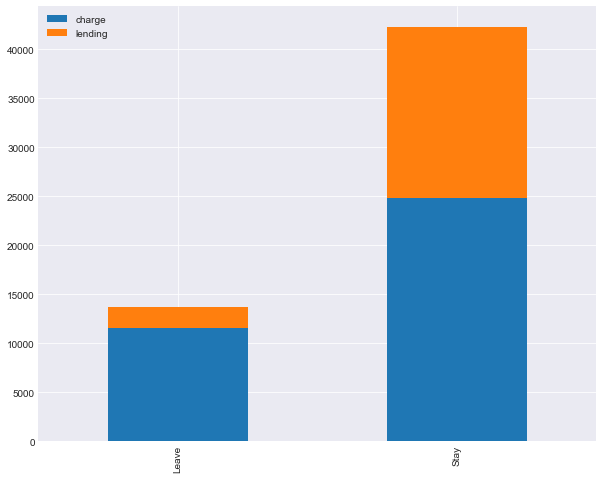

In [218]:
def bar_chart(feature):
    Leave = train[train['default_status'] == 'yes'][feature].value_counts()
    Stay = train[train['default_status'] == 'no'][feature].value_counts()
    df = pd.DataFrame([Leave, Stay], index = ['Leave', 'Stay'])
    df.plot(kind = 'bar', stacked = 'True', figsize = (10,8))

bar_chart('form_field47')

In [219]:
categorical_features = train.select_dtypes(include=[np.object])
categorical_features.columns

Index(['Applicant_ID', 'form_field47', 'default_status'], dtype='object')

In [220]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.columns

Index(['form_field1', 'form_field2', 'form_field3', 'form_field4',
       'form_field5', 'form_field6', 'form_field7', 'form_field8',
       'form_field9', 'form_field10', 'form_field11', 'form_field12',
       'form_field13', 'form_field14', 'form_field15', 'form_field16',
       'form_field17', 'form_field18', 'form_field19', 'form_field20',
       'form_field21', 'form_field22', 'form_field23', 'form_field24',
       'form_field25', 'form_field26', 'form_field27', 'form_field28',
       'form_field29', 'form_field30', 'form_field31', 'form_field32',
       'form_field33', 'form_field34', 'form_field35', 'form_field36',
       'form_field37', 'form_field38', 'form_field39', 'form_field40',
       'form_field41', 'form_field42', 'form_field43', 'form_field44',
       'form_field45', 'form_field46', 'form_field48', 'form_field49',
       'form_field50'],
      dtype='object')

In [221]:
train['default_status'].groupby(train['form_field47']).apply(pd.value_counts)

form_field47     
charge        no     24846
              yes    11527
lending       no     17439
              yes     2188
Name: default_status, dtype: int64

In [222]:
train['default_status'] = [0 if x == 'no' else 1 for x in train['default_status']]
train.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,...,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,0
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,...,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,0
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,...,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,1
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,...,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,0
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,...,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,0


In [223]:
train['default_status'].value_counts()

0    42285
1    13715
Name: default_status, dtype: int64

In [224]:
test = pd.get_dummies(test, columns = ['form_field47'])
train = pd.get_dummies(train, columns = ['form_field47'])

In [225]:
corr = train.corr()
corr['default_status'].sort_values(ascending = False)

default_status          1.000000
form_field42            0.329039
form_field21            0.325634
form_field22            0.322421
form_field23            0.318622
form_field16            0.275836
form_field17            0.269507
form_field18            0.265692
form_field35            0.254479
form_field47_charge     0.227926
form_field2             0.226313
form_field46            0.196138
form_field3             0.193603
form_field36            0.167306
form_field40            0.164199
form_field45            0.154638
form_field49            0.152407
form_field38            0.151966
form_field34            0.151109
form_field4             0.147548
form_field39            0.145949
form_field19            0.134433
form_field20            0.127612
form_field41            0.118484
form_field5             0.088912
form_field24            0.064261
form_field11            0.033700
form_field14            0.008272
form_field12           -0.042858
form_field50           -0.049732
form_field

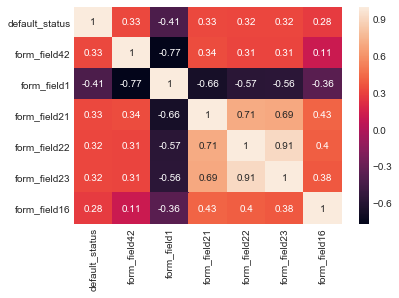

In [226]:
# Plotting heat map to show correlation of top 6 features
features = ['default_status','form_field42', 'form_field1', 'form_field21', 'form_field22','form_field23', 'form_field16' ]
sns.heatmap(train[features].corr(), annot = True)
plt.show()

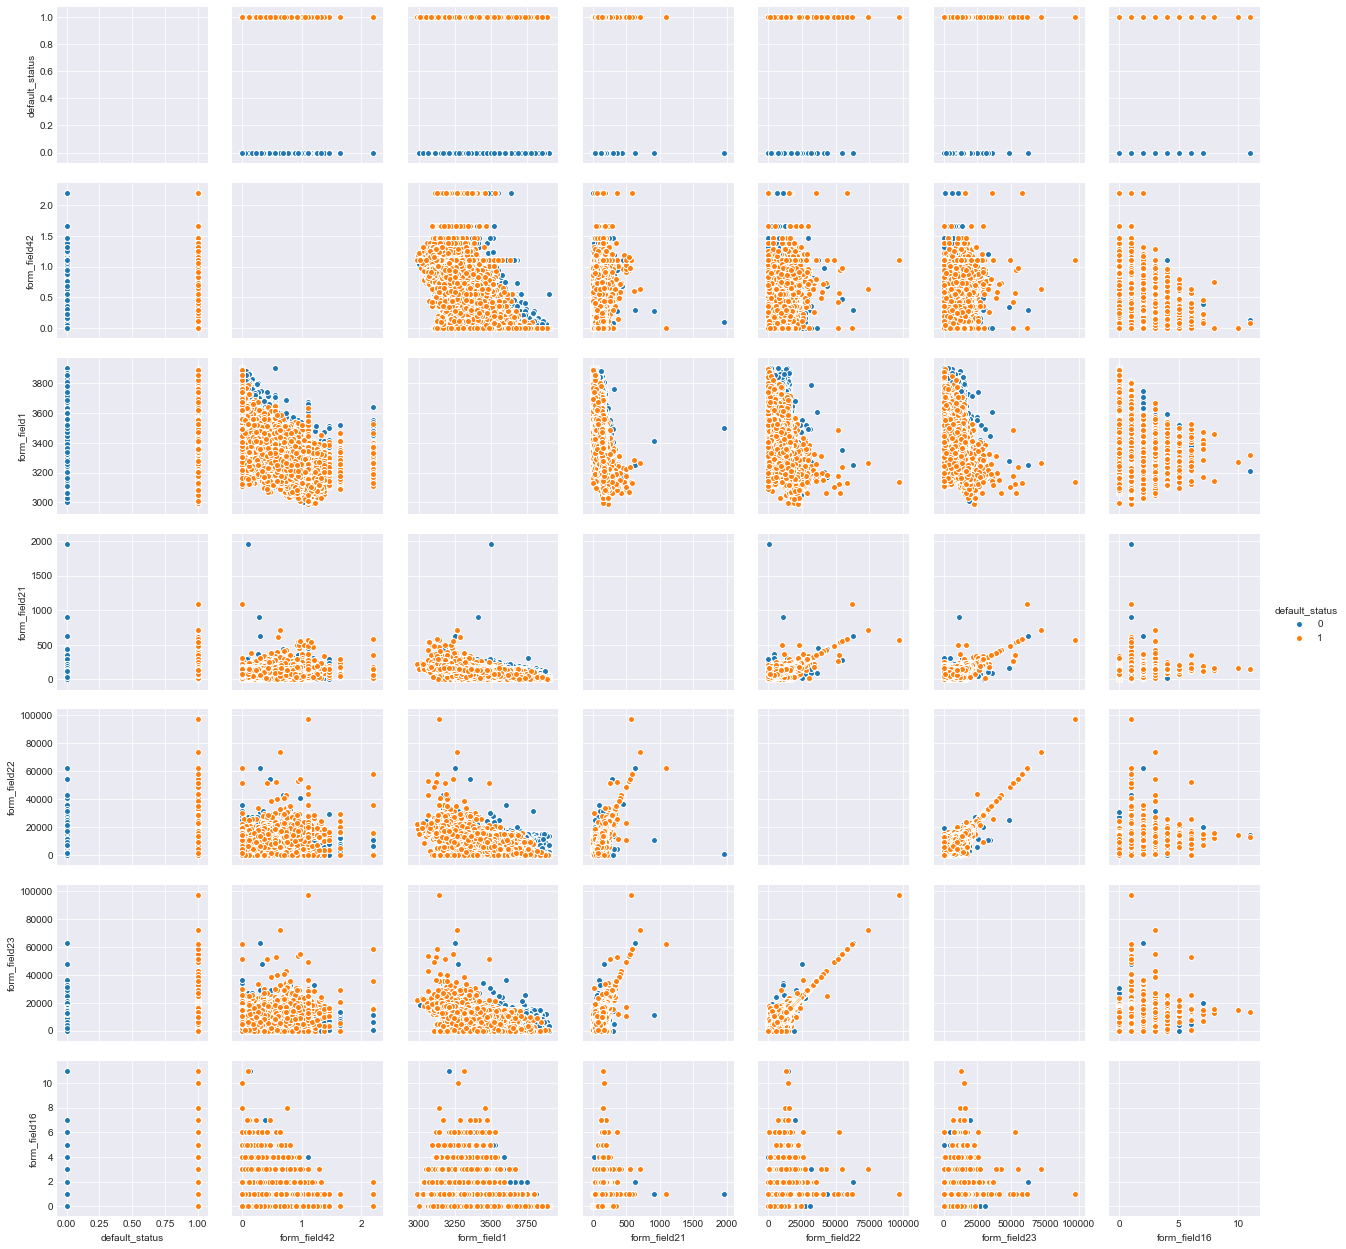

In [227]:
features = ['default_status','form_field42', 'form_field1', 'form_field21', 'form_field22','form_field23', 'form_field16' ]
pairplot = sns.pairplot(train[features], diag_kind='reg', hue = 'default_status' )
plt.show()

In [228]:
# Fill the missing values with -999999
train.fillna(-999999, inplace = True)
test.fillna(-999999, inplace = True)

In [229]:
description(test)

Your selected dataset has 52 columns.
There are 0 columns that have missing values.
Your selected dataset has 1 categorical and 51 numerical features


,Missing Values,% of Total values,dtype,Range


# Modelling

In [230]:
X = train.drop(['default_status', 'Applicant_ID'], axis = 1)
y = train['default_status']
test = test.drop('Applicant_ID', axis = 1)
test.head()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50,form_field47_charge,form_field47_lending
0,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,0.0,...,0.825000,1.01,0.800000,-999999.0,0.0,-999999.000000,0.000000,0.011221,1,0
1,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,18308285.0,...,0.507694,4.04,0.623248,1.0,0.0,-999999.000000,0.504974,0.043525,0,1
2,-999999.0,0.27505,0.0600,0.0000,0.0,-999999.0,-999999.0,-999999.0,-999999.0,0.0,...,-999999.000000,0.00,-999999.000000,-999999.0,-999999.0,-999999.000000,0.000000,-999999.000000,1,0
3,3232.0,0.28505,2.8032,0.0000,0.0,0.0,473802.0,473802.0,1724437.0,493641.0,...,0.916663,2.02,0.464224,-999999.0,-999999.0,90.163742,0.788809,0.104029,1,0
4,3466.0,2.09545,0.8318,2.5182,0.0,19839.0,1150662.0,1150662.0,7860523.0,5752921.0,...,0.234047,23.23,0.726688,0.0,0.0,1303.587148,1.637733,0.163124,0,1


In [231]:
# splitting the training and testing_set using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.25, random_state = 42)
print(len(y_test), 'test +', len(y_train), 'train')

14000 test + 42000 train


# GradientBoost

In [232]:
gtb_clf = GradientBoostingClassifier(loss = 'deviance',
                                    n_estimators = 1200,
                                    learning_rate=0.05,
                                    min_samples_split=1200,
                                    min_samples_leaf=60,
                                    max_depth=5,
                                    max_features=6,
                                    subsample=0.8,
                                    random_state=10)
gtb_clf.fit(X_train, y_train)
y_pred_gtb = gtb_clf.predict_proba(X_test)[:, 1]
print(roc_auc_score(y_test, y_pred_gtb))

0.84281732938398


In [233]:
acc_test = []
acc_train = []
val_gtb = np.zeros(train.shape[0])
test_gtb= np.zeros(test.shape[0])
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, random_state = None)
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    print(f"----------------------------Fold{fold+1}--------------------")
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    gtb_clf = GradientBoostingClassifier(loss = 'deviance',
                                    n_estimators = 1200,
                                    learning_rate=0.05,
                                    min_samples_split=1200,
                                    min_samples_leaf=60,
                                    max_depth=5,
                                    max_features=6,
                                    subsample=0.8,
                                    random_state=10)
    gtb_clf.fit(X_train, y_train)
    y_pred_gtb = gtb_clf.predict_proba(X_test)[:, 1]
    y_train_predict = gtb_clf.predict_proba(X_train)[:,1]
    
    acc_test.append(roc_auc_score(y_test, y_pred_gtb))
    acc_train.append(roc_auc_score(y_train, y_train_predict))
    
    val_gtb[test_index] = y_pred_gtb
    p = gtb_clf.predict_proba(test)[:,1]
    test_gtb+=p
    print('\nValidation scores', roc_auc_score(y_test, y_pred_gtb))
    print('Training scores', roc_auc_score(y_train, y_train_predict))

print('\nModel report: ')
print(f'The mean of the Validation scores is {np.array(acc_test).mean(axis = 0)}')
print(f'The mean of the Training scores is {np.array(acc_train).mean(axis = 0)}') 

----------------------------Fold1--------------------

Validation scores 0.8324568249081208
Training scores 0.8884109132163074
----------------------------Fold2--------------------

Validation scores 0.8451620319782813
Training scores 0.887001514723902
----------------------------Fold3--------------------

Validation scores 0.8367142705475933
Training scores 0.8880963569662201
----------------------------Fold4--------------------

Validation scores 0.8341891024558321
Training scores 0.8887921254590194
----------------------------Fold5--------------------

Validation scores 0.841612164238732
Training scores 0.8878749743403169
----------------------------Fold6--------------------

Validation scores 0.8402858716196493
Training scores 0.8884442591153008
----------------------------Fold7--------------------

Validation scores 0.8185380779175612
Training scores 0.8912093813947018
----------------------------Fold8--------------------

Validation scores 0.8408769089678272
Training scores 0.888

In [234]:
print('\nModel report: ')
print(f'The mean of the Validation scores is {np.array(acc_test).mean(axis = 0)}')
print(f'The mean of the Training scores is {np.array(acc_train).mean(axis = 0)}') 


Model report: 
The mean of the Validation scores is 0.8390012322316659
The mean of the Training scores is 0.888320904874352


In [235]:
test_gtb = test_gtb/10
test_gtb

array([0.29961186, 0.25551739, 0.41124714, ..., 0.20513925, 0.49264502,
       0.26239414])

In [236]:
val_gtb

array([0.26430855, 0.20315687, 0.27070801, ..., 0.08089964, 0.70133295,
       0.18626785])

# Catboost Model (Tuned)

In [237]:
cat_clf = CatBoostClassifier(learning_rate = 0.01, l2_leaf_reg = 9, iterations=10000, max_depth=8, eval_metric='AUC')
cat_clf.fit(X_train, y_train,eval_set=(X_test, y_test),early_stopping_rounds=500, verbose=100)
y_cat_pred = cat_clf.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test, y_cat_pred))


0:	test: 0.8136380	best: 0.8136380 (0)	total: 883ms	remaining: 2h 27m 9s
100:	test: 0.8314032	best: 0.8314032 (100)	total: 16.3s	remaining: 26m 34s
200:	test: 0.8360831	best: 0.8360831 (200)	total: 35.4s	remaining: 28m 45s
300:	test: 0.8382700	best: 0.8382700 (300)	total: 53.4s	remaining: 28m 41s
400:	test: 0.8398049	best: 0.8398049 (400)	total: 1m 8s	remaining: 27m 13s
500:	test: 0.8411648	best: 0.8411648 (500)	total: 1m 25s	remaining: 27m 4s
600:	test: 0.8421054	best: 0.8421151 (599)	total: 1m 39s	remaining: 26m 3s
700:	test: 0.8430301	best: 0.8430301 (700)	total: 1m 53s	remaining: 25m 10s
800:	test: 0.8435248	best: 0.8435423 (791)	total: 2m 8s	remaining: 24m 35s
900:	test: 0.8438388	best: 0.8438471 (899)	total: 2m 22s	remaining: 24m 2s
1000:	test: 0.8443747	best: 0.8443747 (1000)	total: 2m 38s	remaining: 23m 44s
1100:	test: 0.8449528	best: 0.8449559 (1098)	total: 2m 52s	remaining: 23m 11s
1200:	test: 0.8453585	best: 0.8453652 (1199)	total: 3m 5s	remaining: 22m 41s
1300:	test: 0.8456

In [238]:
acc_val = []
acc_train = []
val_cat = np.zeros(train.shape[0])
test_cat = np.zeros(test.shape[0])
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, random_state = None)
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    
    print(f"--------------------------Fold{fold+1}-----------------------------")
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    cat_clf = CatBoostClassifier(learning_rate = 0.01, l2_leaf_reg = 9, iterations=10000, max_depth=8,eval_metric='AUC')
    cat_clf.fit(X_train, y_train,eval_set=(X_test, y_test),early_stopping_rounds=500, verbose=100)
    
    y_train_predict = cat_clf.predict_proba(X_train)[:,1]
    y_pred_cat = cat_clf.predict_proba(X_test)[:,1]
    val_cat[test_index] = y_pred_cat
    
    acc_val.append(roc_auc_score(y_test, y_pred_cat))
    acc_train.append(roc_auc_score(y_train, y_train_predict))
    
    p = cat_clf.predict_proba(test)[:,1]
    test_cat+=p
    
    print('\nValidation scores', roc_auc_score(y_test, y_pred_cat))
    print('Training scores', roc_auc_score(y_train, y_train_predict))

print('\nModel report: ')
print(f'The mean of the Validation scores is {np.array(acc_val).mean(axis = 0)}')
print(f'The mean of the Training scores is {np.array(acc_train).mean(axis = 0)}') 

--------------------------Fold1-----------------------------
0:	test: 0.7960689	best: 0.7960689 (0)	total: 149ms	remaining: 24m 49s
100:	test: 0.8205692	best: 0.8205985 (97)	total: 17.1s	remaining: 27m 58s
200:	test: 0.8238428	best: 0.8238489 (199)	total: 32.8s	remaining: 26m 40s
300:	test: 0.8254116	best: 0.8254116 (300)	total: 47.7s	remaining: 25m 38s
400:	test: 0.8267683	best: 0.8267803 (398)	total: 1m 1s	remaining: 24m 41s
500:	test: 0.8278265	best: 0.8278265 (500)	total: 1m 15s	remaining: 23m 55s
600:	test: 0.8286203	best: 0.8286203 (600)	total: 1m 30s	remaining: 23m 35s
700:	test: 0.8292286	best: 0.8292286 (700)	total: 1m 45s	remaining: 23m 23s
800:	test: 0.8296960	best: 0.8296961 (799)	total: 1m 59s	remaining: 22m 50s
900:	test: 0.8301272	best: 0.8301272 (900)	total: 2m 13s	remaining: 22m 24s
1000:	test: 0.8305634	best: 0.8305674 (991)	total: 2m 27s	remaining: 22m 4s
1100:	test: 0.8308841	best: 0.8308859 (1099)	total: 2m 41s	remaining: 21m 43s
1200:	test: 0.8312159	best: 0.83121


Validation scores 0.8412367024301867
Training scores 0.8927226916039812
--------------------------Fold4-----------------------------
0:	test: 0.7785296	best: 0.7785296 (0)	total: 132ms	remaining: 22m 1s
100:	test: 0.8218357	best: 0.8218357 (100)	total: 13.1s	remaining: 21m 20s
200:	test: 0.8266723	best: 0.8266811 (199)	total: 25.6s	remaining: 20m 48s
300:	test: 0.8288517	best: 0.8288517 (300)	total: 38.1s	remaining: 20m 28s
400:	test: 0.8304887	best: 0.8304887 (400)	total: 51.2s	remaining: 20m 25s
500:	test: 0.8316079	best: 0.8316079 (500)	total: 1m 3s	remaining: 20m 5s
600:	test: 0.8325414	best: 0.8325414 (600)	total: 1m 15s	remaining: 19m 46s
700:	test: 0.8331024	best: 0.8331024 (700)	total: 1m 28s	remaining: 19m 29s
800:	test: 0.8336714	best: 0.8336852 (797)	total: 1m 40s	remaining: 19m 14s
900:	test: 0.8341229	best: 0.8341229 (900)	total: 1m 52s	remaining: 18m 59s
1000:	test: 0.8345260	best: 0.8345260 (1000)	total: 2m 5s	remaining: 18m 44s
1100:	test: 0.8349162	best: 0.8349195 (10

800:	test: 0.8186789	best: 0.8186789 (800)	total: 1m 39s	remaining: 19m 4s
900:	test: 0.8189078	best: 0.8189078 (900)	total: 1m 52s	remaining: 18m 51s
1000:	test: 0.8192162	best: 0.8192185 (995)	total: 2m 4s	remaining: 18m 37s
1100:	test: 0.8195078	best: 0.8195078 (1100)	total: 2m 16s	remaining: 18m 23s
1200:	test: 0.8197350	best: 0.8197438 (1188)	total: 2m 28s	remaining: 18m 10s
1300:	test: 0.8198433	best: 0.8198618 (1296)	total: 2m 41s	remaining: 17m 56s
1400:	test: 0.8200919	best: 0.8201199 (1380)	total: 2m 53s	remaining: 17m 44s
1500:	test: 0.8203202	best: 0.8203234 (1494)	total: 3m 5s	remaining: 17m 31s
1600:	test: 0.8204356	best: 0.8204490 (1597)	total: 3m 18s	remaining: 17m 18s
1700:	test: 0.8206629	best: 0.8206938 (1671)	total: 3m 30s	remaining: 17m 5s
1800:	test: 0.8206595	best: 0.8207069 (1767)	total: 3m 42s	remaining: 16m 53s
1900:	test: 0.8206847	best: 0.8207069 (1767)	total: 3m 54s	remaining: 16m 40s
2000:	test: 0.8206895	best: 0.8207323 (1960)	total: 4m 7s	remaining: 16m 

2400:	test: 0.8473078	best: 0.8473913 (2333)	total: 5m 4s	remaining: 16m 2s
2500:	test: 0.8473014	best: 0.8473913 (2333)	total: 5m 16s	remaining: 15m 49s
2600:	test: 0.8473600	best: 0.8474232 (2551)	total: 5m 28s	remaining: 15m 35s
2700:	test: 0.8473562	best: 0.8474232 (2551)	total: 5m 41s	remaining: 15m 23s
2800:	test: 0.8474487	best: 0.8474704 (2794)	total: 5m 54s	remaining: 15m 11s
2900:	test: 0.8474848	best: 0.8475322 (2889)	total: 6m 7s	remaining: 14m 58s
3000:	test: 0.8475017	best: 0.8475653 (2948)	total: 6m 19s	remaining: 14m 45s
3100:	test: 0.8474685	best: 0.8475653 (2948)	total: 6m 32s	remaining: 14m 32s
3200:	test: 0.8475006	best: 0.8475653 (2948)	total: 6m 44s	remaining: 14m 18s
3300:	test: 0.8474277	best: 0.8475653 (2948)	total: 6m 56s	remaining: 14m 5s
3400:	test: 0.8474825	best: 0.8475653 (2948)	total: 7m 8s	remaining: 13m 52s
Stopped by overfitting detector  (500 iterations wait)

bestTest = 0.8475653264
bestIteration = 2948

Shrink model to first 2949 iterations.

Valid

In [239]:
test_cat = test_cat/10
test_cat

array([0.31083098, 0.37213085, 0.38488253, ..., 0.26868891, 0.5396614 ,
       0.20054186])

In [240]:
val_cat

array([0.32036116, 0.2244275 , 0.3421616 , ..., 0.07999268, 0.74692403,
       0.16045407])

## XGBoost

In [241]:
xgb_cl = XGBClassifier()
xgb_cl.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [242]:
y_pred_prob = xgb_cl.predict_proba(X_test)[:, 1]
print(roc_auc_score(y_test, y_pred_prob))

0.8405251503125633


In [243]:
acc_val = []
acc_train = []
val_xgb = np.zeros(train.shape[0])
test_xgb = np.zeros(test.shape[0])
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, random_state = None)
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    print(f"-----------------------------Fold{fold+1}-----------------------------------")
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    xgb = XGBClassifier(learning_rate =0.04,n_estimators=10000,max_depth=5,min_child_weight=5,gamma=0,subsample=0.8,colsample_bytree=0.8,objective= 'binary:logistic',)
    xgb.fit(X_train, y_train,early_stopping_rounds = 30, eval_metric="auc", eval_set=[(X_test, y_test)])
    
    y_train_predict = xgb.predict_proba(X_train)[:,1]
    y_pred_xgb = xgb.predict_proba(X_test)[:,1]
    
    val_xgb[test_index] = y_pred_xgb
    
    acc_val.append(roc_auc_score(y_test, y_pred_xgb))
    acc_train.append(roc_auc_score(y_train, y_train_predict))

    p = xgb.predict_proba(test)[:,1]
    test_xgb+=p
    #Print model report:
    print("\nModel Report")
    print('\nValidation scores', roc_auc_score(y_test, y_pred_xgb))
    print('Training scores', roc_auc_score(y_train, y_train_predict))
    

print('\nModel report: ')
print(f'The mean of the Validation scores is {np.array(acc_val).mean(axis = 0)}')
print(f'The mean of the Training scores is {np.array(acc_train).mean(axis = 0)}') 

-----------------------------Fold1-----------------------------------
[0]	validation_0-auc:0.793001
Will train until validation_0-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.803597
[2]	validation_0-auc:0.812414
[3]	validation_0-auc:0.811393
[4]	validation_0-auc:0.809998
[5]	validation_0-auc:0.810402
[6]	validation_0-auc:0.810854
[7]	validation_0-auc:0.811375
[8]	validation_0-auc:0.810818
[9]	validation_0-auc:0.810834
[10]	validation_0-auc:0.811634
[11]	validation_0-auc:0.811794
[12]	validation_0-auc:0.812495
[13]	validation_0-auc:0.812509
[14]	validation_0-auc:0.813213
[15]	validation_0-auc:0.814702
[16]	validation_0-auc:0.81491
[17]	validation_0-auc:0.815008
[18]	validation_0-auc:0.815582
[19]	validation_0-auc:0.815618
[20]	validation_0-auc:0.815695
[21]	validation_0-auc:0.816007
[22]	validation_0-auc:0.816204
[23]	validation_0-auc:0.816337
[24]	validation_0-auc:0.816748
[25]	validation_0-auc:0.817119
[26]	validation_0-auc:0.817149
[27]	validation_0-auc:0.817172
[28]	vali

[256]	validation_0-auc:0.830817
[257]	validation_0-auc:0.83081
[258]	validation_0-auc:0.830772
[259]	validation_0-auc:0.830834
[260]	validation_0-auc:0.830831
[261]	validation_0-auc:0.830907
[262]	validation_0-auc:0.830904
[263]	validation_0-auc:0.830968
[264]	validation_0-auc:0.830955
[265]	validation_0-auc:0.830984
[266]	validation_0-auc:0.831038
[267]	validation_0-auc:0.831057
[268]	validation_0-auc:0.831083
[269]	validation_0-auc:0.831083
[270]	validation_0-auc:0.831077
[271]	validation_0-auc:0.831105
[272]	validation_0-auc:0.831129
[273]	validation_0-auc:0.831145
[274]	validation_0-auc:0.831171
[275]	validation_0-auc:0.831138
[276]	validation_0-auc:0.831197
[277]	validation_0-auc:0.831235
[278]	validation_0-auc:0.831202
[279]	validation_0-auc:0.831205
[280]	validation_0-auc:0.831186
[281]	validation_0-auc:0.831138
[282]	validation_0-auc:0.831089
[283]	validation_0-auc:0.831039
[284]	validation_0-auc:0.831045
[285]	validation_0-auc:0.831139
[286]	validation_0-auc:0.831148
[287]	val

[127]	validation_0-auc:0.843
[128]	validation_0-auc:0.843194
[129]	validation_0-auc:0.843204
[130]	validation_0-auc:0.843257
[131]	validation_0-auc:0.843361
[132]	validation_0-auc:0.843466
[133]	validation_0-auc:0.843536
[134]	validation_0-auc:0.843662
[135]	validation_0-auc:0.843741
[136]	validation_0-auc:0.843702
[137]	validation_0-auc:0.843756
[138]	validation_0-auc:0.843762
[139]	validation_0-auc:0.843796
[140]	validation_0-auc:0.843849
[141]	validation_0-auc:0.843899
[142]	validation_0-auc:0.843915
[143]	validation_0-auc:0.843992
[144]	validation_0-auc:0.843999
[145]	validation_0-auc:0.844
[146]	validation_0-auc:0.843957
[147]	validation_0-auc:0.843965
[148]	validation_0-auc:0.844044
[149]	validation_0-auc:0.844036
[150]	validation_0-auc:0.844125
[151]	validation_0-auc:0.84422
[152]	validation_0-auc:0.844211
[153]	validation_0-auc:0.844228
[154]	validation_0-auc:0.84433
[155]	validation_0-auc:0.844377
[156]	validation_0-auc:0.84442
[157]	validation_0-auc:0.844382
[158]	validation_

[57]	validation_0-auc:0.83047
[58]	validation_0-auc:0.830545
[59]	validation_0-auc:0.830628
[60]	validation_0-auc:0.830714
[61]	validation_0-auc:0.830803
[62]	validation_0-auc:0.831075
[63]	validation_0-auc:0.831185
[64]	validation_0-auc:0.831339
[65]	validation_0-auc:0.831542
[66]	validation_0-auc:0.831728
[67]	validation_0-auc:0.831869
[68]	validation_0-auc:0.831984
[69]	validation_0-auc:0.832147
[70]	validation_0-auc:0.832324
[71]	validation_0-auc:0.832324
[72]	validation_0-auc:0.832483
[73]	validation_0-auc:0.83253
[74]	validation_0-auc:0.832664
[75]	validation_0-auc:0.832777
[76]	validation_0-auc:0.832963
[77]	validation_0-auc:0.832921
[78]	validation_0-auc:0.833028
[79]	validation_0-auc:0.83302
[80]	validation_0-auc:0.83313
[81]	validation_0-auc:0.833276
[82]	validation_0-auc:0.833385
[83]	validation_0-auc:0.833486
[84]	validation_0-auc:0.833656
[85]	validation_0-auc:0.833746
[86]	validation_0-auc:0.833878
[87]	validation_0-auc:0.834021
[88]	validation_0-auc:0.834174
[89]	validat

[15]	validation_0-auc:0.815119
[16]	validation_0-auc:0.815072
[17]	validation_0-auc:0.815363
[18]	validation_0-auc:0.815653
[19]	validation_0-auc:0.815646
[20]	validation_0-auc:0.816209
[21]	validation_0-auc:0.816599
[22]	validation_0-auc:0.816907
[23]	validation_0-auc:0.816944
[24]	validation_0-auc:0.817077
[25]	validation_0-auc:0.8174
[26]	validation_0-auc:0.817198
[27]	validation_0-auc:0.817329
[28]	validation_0-auc:0.817684
[29]	validation_0-auc:0.818118
[30]	validation_0-auc:0.818453
[31]	validation_0-auc:0.818666
[32]	validation_0-auc:0.818972
[33]	validation_0-auc:0.819231
[34]	validation_0-auc:0.819431
[35]	validation_0-auc:0.819439
[36]	validation_0-auc:0.819518
[37]	validation_0-auc:0.819778
[38]	validation_0-auc:0.820167
[39]	validation_0-auc:0.820487
[40]	validation_0-auc:0.820866
[41]	validation_0-auc:0.821231
[42]	validation_0-auc:0.821518
[43]	validation_0-auc:0.821483
[44]	validation_0-auc:0.821619
[45]	validation_0-auc:0.821805
[46]	validation_0-auc:0.821939
[47]	valid

[275]	validation_0-auc:0.833079
[276]	validation_0-auc:0.833081
[277]	validation_0-auc:0.833072
[278]	validation_0-auc:0.833019
[279]	validation_0-auc:0.833099
[280]	validation_0-auc:0.833182
[281]	validation_0-auc:0.833244
[282]	validation_0-auc:0.833216
[283]	validation_0-auc:0.833221
[284]	validation_0-auc:0.833167
[285]	validation_0-auc:0.833192
[286]	validation_0-auc:0.833184
[287]	validation_0-auc:0.833221
[288]	validation_0-auc:0.833223
[289]	validation_0-auc:0.833247
[290]	validation_0-auc:0.833279
[291]	validation_0-auc:0.83329
[292]	validation_0-auc:0.833282
[293]	validation_0-auc:0.833237
[294]	validation_0-auc:0.833239
[295]	validation_0-auc:0.833246
[296]	validation_0-auc:0.833267
[297]	validation_0-auc:0.833224
[298]	validation_0-auc:0.833218
[299]	validation_0-auc:0.83325
[300]	validation_0-auc:0.83328
[301]	validation_0-auc:0.833305
[302]	validation_0-auc:0.833303
[303]	validation_0-auc:0.833289
[304]	validation_0-auc:0.833299
[305]	validation_0-auc:0.833297
[306]	valid

[165]	validation_0-auc:0.839515
[166]	validation_0-auc:0.839531
[167]	validation_0-auc:0.839564
[168]	validation_0-auc:0.839624
[169]	validation_0-auc:0.83961
[170]	validation_0-auc:0.839623
[171]	validation_0-auc:0.839607
[172]	validation_0-auc:0.839656
[173]	validation_0-auc:0.839728
[174]	validation_0-auc:0.83984
[175]	validation_0-auc:0.839801
[176]	validation_0-auc:0.839787
[177]	validation_0-auc:0.839844
[178]	validation_0-auc:0.839888
[179]	validation_0-auc:0.839916
[180]	validation_0-auc:0.840002
[181]	validation_0-auc:0.839991
[182]	validation_0-auc:0.839984
[183]	validation_0-auc:0.840057
[184]	validation_0-auc:0.840135
[185]	validation_0-auc:0.84018
[186]	validation_0-auc:0.840245
[187]	validation_0-auc:0.840288
[188]	validation_0-auc:0.840361
[189]	validation_0-auc:0.840375
[190]	validation_0-auc:0.840368
[191]	validation_0-auc:0.840445
[192]	validation_0-auc:0.840481
[193]	validation_0-auc:0.840465
[194]	validation_0-auc:0.840469
[195]	validation_0-auc:0.840479
[196]	valid

[123]	validation_0-auc:0.839199
[124]	validation_0-auc:0.839272
[125]	validation_0-auc:0.839312
[126]	validation_0-auc:0.83945
[127]	validation_0-auc:0.839564
[128]	validation_0-auc:0.839542
[129]	validation_0-auc:0.839523
[130]	validation_0-auc:0.839535
[131]	validation_0-auc:0.839577
[132]	validation_0-auc:0.839671
[133]	validation_0-auc:0.839665
[134]	validation_0-auc:0.839712
[135]	validation_0-auc:0.839804
[136]	validation_0-auc:0.8398
[137]	validation_0-auc:0.839906
[138]	validation_0-auc:0.839896
[139]	validation_0-auc:0.839892
[140]	validation_0-auc:0.839913
[141]	validation_0-auc:0.839994
[142]	validation_0-auc:0.83995
[143]	validation_0-auc:0.840009
[144]	validation_0-auc:0.840034
[145]	validation_0-auc:0.840014
[146]	validation_0-auc:0.840044
[147]	validation_0-auc:0.840102
[148]	validation_0-auc:0.840189
[149]	validation_0-auc:0.84037
[150]	validation_0-auc:0.840372
[151]	validation_0-auc:0.840454
[152]	validation_0-auc:0.840487
[153]	validation_0-auc:0.840569
[154]	validat

[51]	validation_0-auc:0.809083
[52]	validation_0-auc:0.809159
[53]	validation_0-auc:0.809328
[54]	validation_0-auc:0.80939
[55]	validation_0-auc:0.809496
[56]	validation_0-auc:0.809655
[57]	validation_0-auc:0.809843
[58]	validation_0-auc:0.810005
[59]	validation_0-auc:0.810026
[60]	validation_0-auc:0.810137
[61]	validation_0-auc:0.81013
[62]	validation_0-auc:0.810243
[63]	validation_0-auc:0.810402
[64]	validation_0-auc:0.810527
[65]	validation_0-auc:0.810677
[66]	validation_0-auc:0.810817
[67]	validation_0-auc:0.81098
[68]	validation_0-auc:0.811028
[69]	validation_0-auc:0.811089
[70]	validation_0-auc:0.811343
[71]	validation_0-auc:0.811386
[72]	validation_0-auc:0.811455
[73]	validation_0-auc:0.811595
[74]	validation_0-auc:0.811599
[75]	validation_0-auc:0.811717
[76]	validation_0-auc:0.81184
[77]	validation_0-auc:0.811868
[78]	validation_0-auc:0.811891
[79]	validation_0-auc:0.812101
[80]	validation_0-auc:0.812109
[81]	validation_0-auc:0.812144
[82]	validation_0-auc:0.812245
[83]	validat

[310]	validation_0-auc:0.818516
[311]	validation_0-auc:0.818544
[312]	validation_0-auc:0.818569
[313]	validation_0-auc:0.818616
[314]	validation_0-auc:0.818578
[315]	validation_0-auc:0.818599
[316]	validation_0-auc:0.818585
[317]	validation_0-auc:0.818519
[318]	validation_0-auc:0.818453
[319]	validation_0-auc:0.818478
[320]	validation_0-auc:0.818469
[321]	validation_0-auc:0.818438
[322]	validation_0-auc:0.81843
[323]	validation_0-auc:0.818408
[324]	validation_0-auc:0.818378
[325]	validation_0-auc:0.818386
[326]	validation_0-auc:0.81838
[327]	validation_0-auc:0.818392
[328]	validation_0-auc:0.818416
[329]	validation_0-auc:0.818415
[330]	validation_0-auc:0.818404
[331]	validation_0-auc:0.81837
[332]	validation_0-auc:0.81834
[333]	validation_0-auc:0.818288
Stopping. Best iteration:
[303]	validation_0-auc:0.818686


Model Report

Validation scores 0.8186857509969657
Training scores 0.8762972501969495
-----------------------------Fold8-----------------------------------
[0]	validation_0-auc

[228]	validation_0-auc:0.841776
[229]	validation_0-auc:0.841858
[230]	validation_0-auc:0.841859
[231]	validation_0-auc:0.841909
[232]	validation_0-auc:0.841946
[233]	validation_0-auc:0.841991
[234]	validation_0-auc:0.84199
[235]	validation_0-auc:0.841934
[236]	validation_0-auc:0.841924
[237]	validation_0-auc:0.8419
[238]	validation_0-auc:0.841907
[239]	validation_0-auc:0.841932
[240]	validation_0-auc:0.841933
[241]	validation_0-auc:0.841945
[242]	validation_0-auc:0.841981
[243]	validation_0-auc:0.842022
[244]	validation_0-auc:0.842029
[245]	validation_0-auc:0.842011
[246]	validation_0-auc:0.842004
[247]	validation_0-auc:0.841993
[248]	validation_0-auc:0.841999
[249]	validation_0-auc:0.842046
[250]	validation_0-auc:0.842041
[251]	validation_0-auc:0.842039
[252]	validation_0-auc:0.842
[253]	validation_0-auc:0.842049
[254]	validation_0-auc:0.842059
[255]	validation_0-auc:0.842054
[256]	validation_0-auc:0.842068
[257]	validation_0-auc:0.842013
[258]	validation_0-auc:0.842018
[259]	validati

[91]	validation_0-auc:0.852135
[92]	validation_0-auc:0.852178
[93]	validation_0-auc:0.852252
[94]	validation_0-auc:0.852329
[95]	validation_0-auc:0.852339
[96]	validation_0-auc:0.852406
[97]	validation_0-auc:0.85249
[98]	validation_0-auc:0.852567
[99]	validation_0-auc:0.852619
[100]	validation_0-auc:0.852716
[101]	validation_0-auc:0.852668
[102]	validation_0-auc:0.852808
[103]	validation_0-auc:0.852949
[104]	validation_0-auc:0.852918
[105]	validation_0-auc:0.853002
[106]	validation_0-auc:0.853084
[107]	validation_0-auc:0.853156
[108]	validation_0-auc:0.853226
[109]	validation_0-auc:0.853348
[110]	validation_0-auc:0.853458
[111]	validation_0-auc:0.853535
[112]	validation_0-auc:0.85356
[113]	validation_0-auc:0.853532
[114]	validation_0-auc:0.85357
[115]	validation_0-auc:0.853646
[116]	validation_0-auc:0.853616
[117]	validation_0-auc:0.853672
[118]	validation_0-auc:0.853678
[119]	validation_0-auc:0.853724
[120]	validation_0-auc:0.853784
[121]	validation_0-auc:0.853809
[122]	validation_0-a

[50]	validation_0-auc:0.835799
[51]	validation_0-auc:0.835942
[52]	validation_0-auc:0.836075
[53]	validation_0-auc:0.836381
[54]	validation_0-auc:0.836524
[55]	validation_0-auc:0.836638
[56]	validation_0-auc:0.836628
[57]	validation_0-auc:0.836746
[58]	validation_0-auc:0.836817
[59]	validation_0-auc:0.836846
[60]	validation_0-auc:0.836972
[61]	validation_0-auc:0.837073
[62]	validation_0-auc:0.837122
[63]	validation_0-auc:0.83723
[64]	validation_0-auc:0.837373
[65]	validation_0-auc:0.837546
[66]	validation_0-auc:0.837641
[67]	validation_0-auc:0.837717
[68]	validation_0-auc:0.837692
[69]	validation_0-auc:0.837773
[70]	validation_0-auc:0.837747
[71]	validation_0-auc:0.837789
[72]	validation_0-auc:0.837807
[73]	validation_0-auc:0.83792
[74]	validation_0-auc:0.837981
[75]	validation_0-auc:0.838074
[76]	validation_0-auc:0.838191
[77]	validation_0-auc:0.838115
[78]	validation_0-auc:0.838208
[79]	validation_0-auc:0.838294
[80]	validation_0-auc:0.83842
[81]	validation_0-auc:0.838528
[82]	valida

[309]	validation_0-auc:0.845957
[310]	validation_0-auc:0.845944
[311]	validation_0-auc:0.845952
[312]	validation_0-auc:0.845926
[313]	validation_0-auc:0.845946
[314]	validation_0-auc:0.845952
[315]	validation_0-auc:0.84597
[316]	validation_0-auc:0.845961
[317]	validation_0-auc:0.846018
[318]	validation_0-auc:0.846012
[319]	validation_0-auc:0.846014
[320]	validation_0-auc:0.846024
[321]	validation_0-auc:0.846011
[322]	validation_0-auc:0.846064
[323]	validation_0-auc:0.846094
[324]	validation_0-auc:0.846124
[325]	validation_0-auc:0.846142
[326]	validation_0-auc:0.84613
[327]	validation_0-auc:0.846163
[328]	validation_0-auc:0.846165
[329]	validation_0-auc:0.8461
[330]	validation_0-auc:0.846123
[331]	validation_0-auc:0.846125
[332]	validation_0-auc:0.846165
[333]	validation_0-auc:0.846179
[334]	validation_0-auc:0.846164
[335]	validation_0-auc:0.846233
[336]	validation_0-auc:0.846219
[337]	validation_0-auc:0.846241
[338]	validation_0-auc:0.846242
[339]	validation_0-auc:0.846245
[340]	valida

In [244]:
test_xgb = test_xgb/10
test_xgb

array([0.32362794, 0.35092414, 0.38581672, ..., 0.2732904 , 0.50453021,
       0.18887398])

In [245]:
val_xgb

array([0.27234089, 0.22808132, 0.44819808, ..., 0.08259099, 0.75748277,
       0.17512147])

# LightGBM 

In [246]:
lgbm = LGBMClassifier(max_depth= 5, n_estimators=10000, metric='auc', learning_rate=0.04, subsample=0.7,
                         colsample_bytree=0.7, num_leaves=9, reg_alpha=4, min_child_samples=30,subsample_freq=2)
lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=200, early_stopping_rounds=100)

Training until validation scores don't improve for 100 rounds
[200]	valid_0's auc: 0.842555
[400]	valid_0's auc: 0.846594
[600]	valid_0's auc: 0.847631
Early stopping, best iteration is:
[537]	valid_0's auc: 0.847703


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.7,
        importance_type='split', learning_rate=0.04, max_depth=5,
        metric='auc', min_child_samples=30, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=10000, n_jobs=-1, num_leaves=9,
        objective=None, random_state=None, reg_alpha=4, reg_lambda=0.0,
        silent=True, subsample=0.7, subsample_for_bin=200000,
        subsample_freq=2)

In [247]:
acc_val = []
acc_train = []
val_lgb = np.zeros(train.shape[0])
test_lgb = np.zeros(test.shape[0])
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, random_state = None)
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    print(f"-------------------------------------Fold{fold+1}--------------------------------")
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    lgbm = LGBMClassifier(max_depth= 5, n_estimators=10000, metric='auc', learning_rate=0.04, subsample=0.7,
                         colsample_bytree=0.7, num_leaves=9, reg_alpha=4, min_child_samples=30,subsample_freq=2)
    lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=200, early_stopping_rounds=200)
    
    y_train_predict = lgbm.predict_proba(X_train)[:,1]
    y_pred_lgb = lgbm.predict_proba(X_test)[:,1]
    val_lgb[test_index] = y_pred_lgb
    
    acc_val.append(roc_auc_score(y_test, y_pred_lgb))
    acc_train.append(roc_auc_score(y_train, y_train_predict))
    
    p = lgbm.predict_proba(test)[:,1]
    test_lgb+=p
    print('\nValidation scores', roc_auc_score(y_test, y_pred_lgb))
    print('Training scores', roc_auc_score(y_train, y_train_predict))


print('\nModel report: ')
print(f'The mean of the Validation scores is {np.array(acc_val).mean(axis = 0)}')
print(f'The mean of the Training scores is {np.array(acc_train).mean(axis = 0)}') 
    

-------------------------------------Fold1--------------------------------
Training until validation scores don't improve for 200 rounds
[200]	valid_0's auc: 0.828026
[400]	valid_0's auc: 0.832101
[600]	valid_0's auc: 0.833427
[800]	valid_0's auc: 0.834141
Early stopping, best iteration is:
[791]	valid_0's auc: 0.834262

Validation scores 0.834262178336862
Training scores 0.8683569990563503
-------------------------------------Fold2--------------------------------
Training until validation scores don't improve for 200 rounds
[200]	valid_0's auc: 0.844117
[400]	valid_0's auc: 0.846561
[600]	valid_0's auc: 0.846856
Early stopping, best iteration is:
[554]	valid_0's auc: 0.847233

Validation scores 0.847232802522083
Training scores 0.8602644953216988
-------------------------------------Fold3--------------------------------
Training until validation scores don't improve for 200 rounds
[200]	valid_0's auc: 0.836545
[400]	valid_0's auc: 0.839738
[600]	valid_0's auc: 0.840035
[800]	valid_0's

In [248]:
test_lgb = test_lgb/10
test_lgb

array([0.33884312, 0.3409764 , 0.36357513, ..., 0.25114577, 0.4723206 ,
       0.1822683 ])

In [249]:
val_lgb

array([0.32973782, 0.19409247, 0.35299432, ..., 0.07504117, 0.71867817,
       0.16885891])

# RandomForest Classifier Model

In [250]:
rfc= RandomForestClassifier(n_estimators= 300, max_depth= 12, criterion= 'gini',min_samples_leaf = 6)

rfc.fit(X_train, y_train)
y_train_predict = rfc.predict_proba(X_train)[:,1]
y_predict = rfc.predict_proba(X_test)[:,1]
score = roc_auc_score(y_test, y_predict)
#Print model report:
print("\nModel Report")
print('\nValidation scores', roc_auc_score(y_test, y_predict))
print('Training scores', roc_auc_score(y_train, y_train_predict))


Model Report

Validation scores 0.8417945177404361
Training scores 0.9236853991789202


In [251]:
acc_val = []
acc_train = []
val_rfc = np.zeros(train.shape[0])
test_rfc = np.zeros(test.shape[0])
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, random_state = None)
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    print(f"-------------------------------Fold{fold+1}--------------------------------")
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    rfc= RandomForestClassifier(n_estimators= 300, max_depth= 12, criterion= 'gini',min_samples_leaf = 6)
    rfc.fit(X_train, y_train)
    
    y_train_predict = rfc.predict_proba(X_train)[:,1]
    y_pred_rfc = rfc.predict_proba(X_test)[:,1]
    
    val_rfc[test_index] = y_pred_rfc
    
    acc_val.append(roc_auc_score(y_test, y_pred_rfc))
    acc_train.append(roc_auc_score(y_train, y_train_predict))
    
    
    p = rfc.predict_proba(test)[:,1]
    test_rfc+=p
    print('\nValidation scores', roc_auc_score(y_test, y_pred_rfc))
    print('Training scores', roc_auc_score(y_train, y_train_predict))

print('\nModel report: ')
print(f'The mean of the Validation scores is {np.array(acc_val).mean(axis = 0)}')
print(f'The mean of the Training scores is {np.array(acc_train).mean(axis = 0)}') 

-------------------------------Fold1--------------------------------

Validation scores 0.8285074527057724
Training scores 0.9236901471551426
-------------------------------Fold2--------------------------------

Validation scores 0.8409162198811897
Training scores 0.9228850636860009
-------------------------------Fold3--------------------------------

Validation scores 0.8330985655756069
Training scores 0.923333700455778
-------------------------------Fold4--------------------------------

Validation scores 0.8299195062276506
Training scores 0.9235339707380577
-------------------------------Fold5--------------------------------

Validation scores 0.8380862529790487
Training scores 0.9239114563338489
-------------------------------Fold6--------------------------------

Validation scores 0.8383090190298155
Training scores 0.9231521520376598
-------------------------------Fold7--------------------------------

Validation scores 0.815302208816635
Training scores 0.9247129695588624
--------

In [252]:
test_rfc = test_rfc/10
test_rfc

array([0.36476181, 0.35566983, 0.38958557, ..., 0.37211928, 0.55501418,
       0.211257  ])

In [253]:
val_rfc

array([0.23843649, 0.20536318, 0.45794503, ..., 0.11485104, 0.54371712,
       0.14645949])

# LightGBM 2nd Model (Varied hyperparameter)

In [254]:
lgbm_2 = LGBMClassifier(max_depth= 6, n_estimators=8000, metric='auc', learning_rate=0.01, subsample=0.7,
                         colsample_bytree=0.8, num_leaves=10, reg_alpha=19, min_child_samples=50,subsample_freq=2)
lgbm_2.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=200, early_stopping_rounds=200)

Training until validation scores don't improve for 200 rounds
[200]	valid_0's auc: 0.831065
[400]	valid_0's auc: 0.836874
[600]	valid_0's auc: 0.840074
[800]	valid_0's auc: 0.842516
[1000]	valid_0's auc: 0.844151
[1200]	valid_0's auc: 0.845189
[1400]	valid_0's auc: 0.845882
[1600]	valid_0's auc: 0.846593
[1800]	valid_0's auc: 0.846948
[2000]	valid_0's auc: 0.847178
[2200]	valid_0's auc: 0.8474
[2400]	valid_0's auc: 0.847555
[2600]	valid_0's auc: 0.847744
[2800]	valid_0's auc: 0.847994
[3000]	valid_0's auc: 0.848081
[3200]	valid_0's auc: 0.848156
[3400]	valid_0's auc: 0.848324
[3600]	valid_0's auc: 0.848325
Early stopping, best iteration is:
[3465]	valid_0's auc: 0.84837


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.8,
        importance_type='split', learning_rate=0.01, max_depth=6,
        metric='auc', min_child_samples=50, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=8000, n_jobs=-1, num_leaves=10,
        objective=None, random_state=None, reg_alpha=19, reg_lambda=0.0,
        silent=True, subsample=0.7, subsample_for_bin=200000,
        subsample_freq=2)

In [255]:
acc_val = []
acc_train = []
val_lgb_2 = np.zeros(train.shape[0])
test_lgb_2 = np.zeros(test.shape[0])
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, random_state = None)
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    print(f"-------------------------------------Fold{fold+1}--------------------------------")
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    lgbm_2 = LGBMClassifier(max_depth= 6, n_estimators=8000, metric='auc', learning_rate=0.01, subsample=0.7,
                         colsample_bytree=0.8, num_leaves=10, reg_alpha=19, min_child_samples=50,subsample_freq=2)
    lgbm_2.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=200, early_stopping_rounds=200)
    
    y_train_predict = lgbm_2.predict_proba(X_train)[:,1]
    y_pred_lgb_2 = lgbm_2.predict_proba(X_test)[:,1]
    val_lgb_2[test_index] = y_pred_lgb_2
    
    acc_val.append(roc_auc_score(y_test, y_pred_lgb_2))
    acc_train.append(roc_auc_score(y_train, y_train_predict))
    
    p = lgbm_2.predict_proba(test)[:,1]
    test_lgb_2+= p
    print('\nValidation scores', roc_auc_score(y_test, y_pred_lgb_2))
    print('Training scores', roc_auc_score(y_train, y_train_predict))
    

print('\nModel report: ')
print(f'The mean of the Validation scores is {np.array(acc_val).mean(axis = 0)}')
print(f'The mean of the Training scores is {np.array(acc_train).mean(axis = 0)}') 
    

-------------------------------------Fold1--------------------------------
Training until validation scores don't improve for 200 rounds
[200]	valid_0's auc: 0.815514
[400]	valid_0's auc: 0.822258
[600]	valid_0's auc: 0.825456
[800]	valid_0's auc: 0.827417
[1000]	valid_0's auc: 0.828771
[1200]	valid_0's auc: 0.829609
[1400]	valid_0's auc: 0.830306
[1600]	valid_0's auc: 0.830782
[1800]	valid_0's auc: 0.831206
[2000]	valid_0's auc: 0.831558
[2200]	valid_0's auc: 0.831876
[2400]	valid_0's auc: 0.832116
[2600]	valid_0's auc: 0.832314
[2800]	valid_0's auc: 0.832466
[3000]	valid_0's auc: 0.832614
[3200]	valid_0's auc: 0.832769
[3400]	valid_0's auc: 0.832754
[3600]	valid_0's auc: 0.832912
[3800]	valid_0's auc: 0.832969
[4000]	valid_0's auc: 0.833118
[4200]	valid_0's auc: 0.833158
[4400]	valid_0's auc: 0.833139
Early stopping, best iteration is:
[4235]	valid_0's auc: 0.833228

Validation scores 0.8332279133320051
Training scores 0.8677968257986274
-------------------------------------Fold2----

In [256]:
test_lgb_2 = test_lgb_2/10
test_lgb_2

array([0.30797245, 0.35749625, 0.37478924, ..., 0.22982867, 0.46898094,
       0.17418442])

In [257]:
val_lgb_2

array([0.35578651, 0.17447654, 0.31975863, ..., 0.07578848, 0.74809986,
       0.20956954])

# Catboost 2nd Model (Varied Hyperparameter)

In [258]:
cat_2= CatBoostClassifier(learning_rate = 0.05, l2_leaf_reg = 10, iterations=8000, max_depth=7, eval_metric='AUC', use_best_model= True, random_state=1111)
cat_2.fit(X_train, y_train,eval_set=(X_test, y_test),early_stopping_rounds=400, verbose=200)
y_cat_pred = cat_2.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test, y_cat_pred))


0:	test: 0.8023304	best: 0.8023304 (0)	total: 112ms	remaining: 14m 53s
200:	test: 0.8440143	best: 0.8440157 (199)	total: 18s	remaining: 11m 36s
400:	test: 0.8469626	best: 0.8469626 (400)	total: 35.2s	remaining: 11m 6s
600:	test: 0.8472534	best: 0.8474309 (540)	total: 53.6s	remaining: 10m 59s
800:	test: 0.8472477	best: 0.8474309 (540)	total: 1m 12s	remaining: 10m 50s
Stopped by overfitting detector  (400 iterations wait)

bestTest = 0.847430937
bestIteration = 540

Shrink model to first 541 iterations.
0.8474309369580865


In [260]:
acc_val = []
acc_train = []
val_cat_2 = np.zeros(train.shape[0])
test_cat_2 = np.zeros(test.shape[0])
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, random_state = None)
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    
    print(f"--------------------------Fold{fold+1}-----------------------------")
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    cat_2= CatBoostClassifier(learning_rate = 0.05, l2_leaf_reg = 10, iterations=8000, max_depth=7, eval_metric='AUC', use_best_model= True, random_state=1111)
    cat_2.fit(X_train, y_train,eval_set=(X_test, y_test),early_stopping_rounds=400, verbose=200)
    
    y_train_predict = cat_2.predict_proba(X_train)[:,1]
    y_pred_cat_2 = cat_2.predict_proba(X_test)[:,1]
    val_cat_2[test_index] = y_pred_cat_2
    
    acc_val.append(roc_auc_score(y_test, y_pred_cat_2))
    acc_train.append(roc_auc_score(y_train, y_train_predict))
    
    p = cat_2.predict_proba(test)[:,1]
    test_cat_2+=p
    
    print('\nValidation scores', roc_auc_score(y_test, y_pred_cat_2))
    print('Training scores', roc_auc_score(y_train, y_train_predict))

print('\nModel report: ')
print(f'The mean of the Validation scores is {np.array(acc_val).mean(axis = 0)}')
print(f'The mean of the Training scores is {np.array(acc_train).mean(axis = 0)}') 

--------------------------Fold1-----------------------------
0:	test: 0.7905870	best: 0.7905870 (0)	total: 118ms	remaining: 15m 40s
200:	test: 0.8303185	best: 0.8303507 (198)	total: 18.1s	remaining: 11m 43s
400:	test: 0.8323746	best: 0.8323748 (399)	total: 35.5s	remaining: 11m 12s
600:	test: 0.8328806	best: 0.8330254 (515)	total: 53.2s	remaining: 10m 55s
800:	test: 0.8329663	best: 0.8331043 (742)	total: 1m 11s	remaining: 10m 39s
1000:	test: 0.8330285	best: 0.8331043 (742)	total: 1m 28s	remaining: 10m 22s
Stopped by overfitting detector  (400 iterations wait)

bestTest = 0.8331043393
bestIteration = 742

Shrink model to first 743 iterations.

Validation scores 0.8331043392596034
Training scores 0.8976383273005012
--------------------------Fold2-----------------------------
0:	test: 0.8063598	best: 0.8063598 (0)	total: 95.5ms	remaining: 12m 44s
200:	test: 0.8453351	best: 0.8453606 (195)	total: 17.7s	remaining: 11m 26s
400:	test: 0.8467242	best: 0.8467376 (399)	total: 35.5s	remaining: 11m

In [261]:
test_cat_2 = test_cat_2/10
test_cat_2

array([0.30809868, 0.37501022, 0.36970908, ..., 0.26877785, 0.54781704,
       0.2078983 ])

In [262]:
val_cat_2

array([0.29653212, 0.24234084, 0.35389222, ..., 0.06777438, 0.69837105,
       0.17524198])

# Stacking and Blending

In [263]:
blend_data = [val_cat, val_gtb, val_lgb, val_xgb, val_rfc, val_cat_2, val_lgb_2]
blend_arr = np.vstack(blend_data)
blend_arr = blend_arr.T
blend_arr.shape

(56000, 7)

In [264]:
blend_train =pd.DataFrame(blend_arr, columns = ['CATBOOST', 'GTB', 'LGBM', 'XGBOOST', 'RFC', 'CATBOOST_2', 'LGBM_2' ])
blend_train.head()

,CATBOOST,GTB,LGBM,XGBOOST,RFC,CATBOOST_2,LGBM_2
0,0.320361,0.264309,0.329738,0.272341,0.238436,0.296532,0.355787
1,0.224427,0.203157,0.194092,0.228081,0.205363,0.242341,0.174477
2,0.342162,0.270708,0.352994,0.448198,0.457945,0.353892,0.319759
3,0.215215,0.188537,0.179700,0.172459,0.191838,0.206380,0.195379
4,0.413534,0.419165,0.439220,0.470501,0.444814,0.468252,0.435049


In [265]:
blend_2= [test_cat, test_gtb, test_lgb, test_xgb, test_rfc, test_cat_2, test_lgb_2]
blend_2 = np.vstack(blend_2)
blend_2 = blend_2.T
blend_2.shape

(24000, 7)

In [266]:
blend_pred =pd.DataFrame(blend_2, columns = ['CATBOOST', 'GTB', 'LGBM', 'XGBOOST', 'RFC', 'CATBOOST_2', 'LGBM_2' ])
blend_pred.head()

,CATBOOST,GTB,LGBM,XGBOOST,RFC,CATBOOST_2,LGBM_2
0,0.310831,0.299612,0.338843,0.323628,0.364762,0.308099,0.307972
1,0.372131,0.255517,0.340976,0.350924,0.355670,0.375010,0.357496
2,0.384883,0.411247,0.363575,0.385817,0.389586,0.369709,0.374789
3,0.744526,0.781857,0.753815,0.710481,0.666830,0.723965,0.789494
4,0.149675,0.123210,0.165196,0.142705,0.187019,0.182498,0.172621


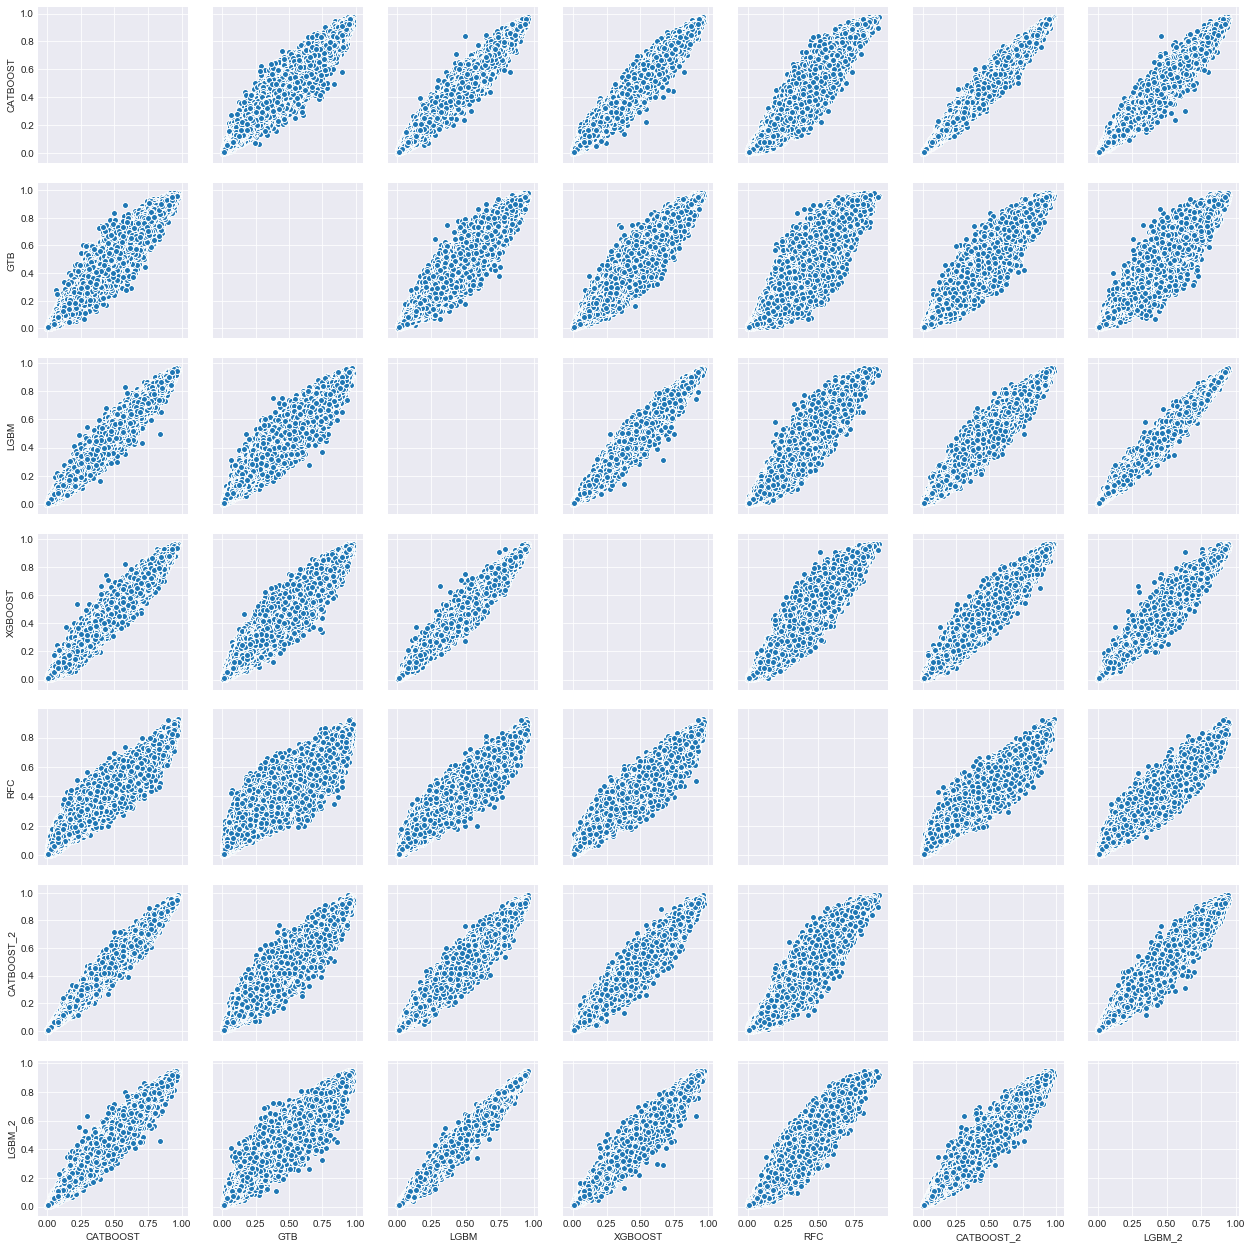

In [267]:
colnames = blend_train.columns
pairplot = sns.pairplot(blend_train[colnames], diag_kind='reg')
plt.show()

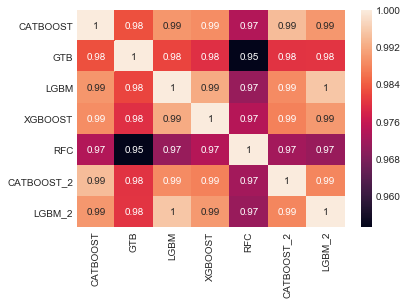

In [268]:
# Plot heat map to show correlation of the blend_train
sns.heatmap(blend_train[colnames].corr(), annot = True)
plt.show()

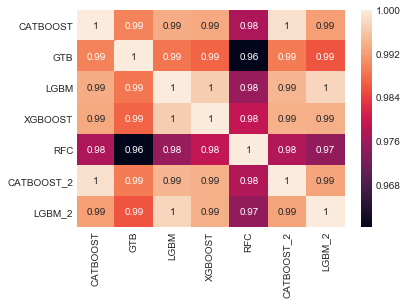

In [269]:
sns.heatmap(blend_pred[colnames].corr(), annot = True)
plt.show()

In [276]:
# Use simple linear regression to stack the models
predict_linear = LinearRegression().fit(blend_train, y).predict(blend_pred)

In [277]:
df1 =pd.DataFrame({'Applicant_ID' : test['Applicant_ID'], 'default_status': predict_linear}).to_csv('submission_late2.csv', index = False)

In [278]:
df1 = pd.read_csv('submission_late2.csv')
df1.head()

,Applicant_ID,default_status
0,Apcnt_1000032,0.319712
1,Apcnt_1000048,0.355226
2,Apcnt_1000052,0.380468
3,Apcnt_1000076,0.754705
4,Apcnt_1000080,0.157455


In [270]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: default_status, dtype: int64

In [284]:
blend_pred =pd.DataFrame(blend_2, columns = ['CATBOOST', 'GTB', 'LGBM', 'XGBOOST', 'RFC', 'CATBOOST_2', 'LGBM_2' ])
catboost_pred = blend_pred.CATBOOST.values
gtb_pred = blend_pred.GTB.values
lgb_pred =blend_pred.LGBM.values
xgb_pred = blend_pred.XGBOOST.values
rfc_pred = blend_pred.RFC.values
cat2_pred = blend_pred.CATBOOST_2.values
lgb2_pred = blend_pred.LGBM_2.values

avg_values = ( 0.6*catboost_pred + 0.4*lgb_pred )
avg_values

array([0.32203583, 0.35966907, 0.37635957, ..., 0.26167165, 0.51272508,
       0.19323244])

In [285]:
pd.DataFrame({'Applicant_ID' : test['Applicant_ID'], 'default_status': avg_values}).to_csv('submission_late5.csv', index = False)